# 庞大的函数库    

除了前面的 ndarray 数组对象和 ufunc 函数之外, numpy 还提供了大量对数组进行处理的函数.     

- 随机数;   
- 求和, 平均值,方差;    
- 大小与排序



## 1. 随机数      

> 对应模块:numpy.random     

|函数名|功能|函数参数|
| :--- | :---: | :---: |
|rand|生成 0 到 1 之间的随机浮点数|它的所有参数用于指定所产生的数组的形状|
|randn|生成符合标准正态分布的随机浮点数|它的所有参数用于指定所产生的数组的形状|
|randint|生成指定范围内的随机整数|3个参数分别是:起始值,终值,产生数组的形状|
|normal|正态分布的随机浮点数|3个参数分别是:期望值,标准差,产生数组的形状|
|uniform|均匀分布的随机浮点数|3个参数分别是:区间起始值,区间终值,产生数组的形状|
|poisson|泊松分布的随机整数|2个参数分别是: λ 系数,产生数组的形状|
|permutation|返回随机排列的列表|如果参数为整数 n, 则返回 `[0, n)` 这n个整数的随机排列; 如果参数为 list, 则对 list 打乱后返回一个新数组|
|shuffle|随机打乱顺序|参数为一个给定的 list 序列|
|choice|从指定的样本中随机进行抽取|size, replace 指定是否进行重复抽取(True), p 指定每个元素随机抽取到的概率(等概率)|
|seed|设置随机种子, 保证每次运行时都能重现相同的随机数|种子初始值|

**Note**:   
- 这些函数的最后一个参数 size 都是用于指定输出数组的形状, 而其他参数都是分布函数的参数.    
- permutation() 返回一个新数组, 而 shuffle() 则直接将参数数组打乱后返回原参数数组.   


In [3]:
import numpy as np
from numpy import random as nr
np.set_printoptions(precision = 2)

## rand()  
r1 = nr.rand(4,3)
r2 = nr.randn(4,3) 
r3 = nr.randint(0, 10, (4, 3))   #  随机数范围包括起始值但不包括终值.
print('r1 =\n', r1, '\n\nr2 =\n', r2, '\n\nr3 =\n', r3, '\n')

r1 =
 [[0.63 0.74 0.67]
 [0.6  0.06 0.36]
 [0.77 0.51 0.32]
 [0.3  0.99 0.75]] 

r2 =
 [[ 1.1   2.01 -0.32]
 [ 0.09  0.11 -1.35]
 [ 0.3   0.72 -1.98]
 [ 0.1  -1.62  0.7 ]] 

r3 =
 [[2 9 9]
 [8 5 6]
 [6 3 2]
 [4 5 2]] 



In [4]:
## 常见分布  
r4 = nr.normal(100, 10, (4,3))
r5 = nr.uniform(10, 20, (4, 3))
r6 = nr.poisson(2.0, (4,3))
print('r4 =\n', r4, '\n\nr5 =\n', r5, '\n\nr6 =\n', r6, '\n')

r4 =
 [[ 79.59  93.92  97.55]
 [101.9  104.09 105.57]
 [116.61  80.64  95.8 ]
 [ 98.48 108.68  94.22]] 

r5 =
 [[11.57 19.85 19.21]
 [18.46 12.59 10.41]
 [13.07 14.24 17.77]
 [13.49 10.53 13.64]] 

r6 =
 [[3 1 0]
 [4 0 2]
 [5 2 5]
 [4 2 3]] 



In [5]:
## choice()
a = np.arange(10, 25, dtype=np.float)
c1 = nr.choice(a, size=(4,3))
c2 = nr.choice(a, size=(4,3), replace=False)
c3 = nr.choice(a, size=(4,3), p = a / np.sum(a))
print('c1 =\n', c1, '\n\nc2 =\n', c2, '\n\nc3 =\n', c3, '\n')

c1 =
 [[11. 11. 17.]
 [19. 23. 20.]
 [21. 17. 16.]
 [13. 23. 16.]] 

c2 =
 [[17. 19. 14.]
 [10. 21. 16.]
 [20. 13. 15.]
 [24. 12. 23.]] 

c3 =
 [[16. 18. 23.]
 [22. 21. 19.]
 [13. 21. 19.]
 [20. 12. 24.]] 



In [6]:
# seed
r1 = nr.randint(0, 100, 3)   #  随机数范围包括起始值但不包括终值.
r2 = nr.randint(0, 100, 3)  
nr.seed(42)
r3 = nr.randint(0, 100, 3)    
nr.seed(42)
r4 = nr.randint(0, 100, 3)    
print('r1 = ', r1, '\n\nr2 = ', r2, '\n\nr3 = ', r3, '\n\nr4 = ', r4, '\n')

r1 =  [41 43 61] 

r2 =  [81 57 24] 

r3 =  [51 92 14] 

r4 =  [51 92 14] 



##  2. 求和, 平均值,方差    

|函数名|功能|
| :--- | :---: |
|sum|求和||
|mean|求期望值|
|average|加权平均数|
|std|标准差|
|var|方差|
|product|连乘积|

**Note**:   
- 函数参数都是一个序列.   


### 2.1 sum()　求和　

(1) axis 参数    
如果指定了 axis 参数, 则求和运算沿着指定的轴进行.    
例如 np.random.randint(0, 14, (4,3)) 的第 0 轴的长度为 4, 第 1 轴的长度为 3 .那么对 axis=0 求和就是计算每 4 个元素的和, 对 axis=1 求和就是计算每 3 个元素的和.

特别的, 可以使用元组形式指定多条轴.    
例如, 对 np.ones((2,3,4)) 的第 0 轴和第 2 轴求和, 可以这样 np.sum(np.ones((2,3,4)), axis=(0,2)). 得到一个形状为 3 的数组,由于原数组的所有元素都为 1, 因此求和的结果是 `[8,8,8]`.     

(2) keepdims 参数   
有时我们希望能够保持原数组的维度(比如两维数组求和后还是两维, 而不是变为一维), 这时可以设置 keepdims 参数为 True.    

(3) dtype 元素类型参数    
默认使用和数组的元素类型相同的类型进行累加运算, 如果元素类型为整数, 则使用系统的系统的默认整数类型作为累加变量, 但是这样可能出现溢出问题.  

In [7]:
# axis
np.random.seed(42)
a = np.random.randint(0, 10, (4,3))
print('a = ', a, '\nsum[0] = ', np.sum(a, axis=0), '\nsum[1] = ', np.sum(a, axis=1), '\nsum = ', np.sum(a))
print('\n\n')

print(np.sum(np.ones((2,3,4)), axis=(0,2)))

# keepdims
print('\n\n')
print('a = ', a, '\nsum[0] = ', np.sum(a, axis=0, keepdims=True), '\nsum[1] = ', np.sum(a, axis=1, keepdims=True))

# dtype
pa = a / np.sum(a, axis=0, dtype=np.float, keepdims=True) * 100
pa.sum(axis = 0)


a =  [[6 3 7]
 [4 6 9]
 [2 6 7]
 [4 3 7]] 
sum[0] =  [16 18 30] 
sum[1] =  [16 19 15 14] 
sum =  64



[8. 8. 8.]



a =  [[6 3 7]
 [4 6 9]
 [2 6 7]
 [4 3 7]] 
sum[0] =  [[16 18 30]] 
sum[1] =  [[16]
 [19]
 [15]
 [14]]


array([100., 100., 100.])

### 2.2 mean()　求均值    

和 sum() 不同的是, 对于整数数组它使用双精度浮点数进行计算, 为对于其他类型的数组, 则使用和数组元素类型相同的累加变量进行计算.   

(1) 参数    
axis, dtype.    


In [8]:
## 对于整数数组,使用双精度浮点数进行计算
np.mean(a, axis = 1)   

array([5.33, 6.33, 5.  , 4.67])

### 2.3 average()　求加权平均     

average() 也可以对数组进行平均计算. 它没有 out 和 dtype 参数, 但有一个指定每个元素权值的 weights 参数可以用于计算加权平均值.   

In [11]:
# score 保存每个班级的平均分, number 保存每个班级的人数
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
print(np.average(score, weights=number))  # 等价于 np.sum(score*number)/np.sum(number, dtype=np.float)

78.61538461538461
[1660 1080 2370]


### 2.4 std() 和 var() 求标准差和方差     

std() 和 var() 分别计算数组的标准差和方差. 有 axis, out, keepdims 和 dtype 等参数.   
方差有两种定义: 偏样本方差和无偏样本方差. ddof 参数默认为 0, 当 ddof 参数为 0 时, 计算偏样本方差; 当 ddof 参数为 1 时, 计算无偏样本方差;    

In [13]:
a = np.random.normal(0, 2.0, (100000, 10))
v1 = np.var(a, axis=1, ddof=0)   # 可以省略 ddof 
v2 = np.var(a, axis=1, ddof=1)
m1 = np.mean(v1)
m2 = np.mean(v2)
print('v1 = ', v1, '\nv2 = ', v2, '\nm1 = ', m1, '\nm2 = ', m2)


v1 =  [2.01 3.36 0.46 ... 6.43 5.92 6.44] 
v2 =  [2.23 3.74 0.51 ... 7.14 6.58 7.16] 
m1 =  3.599548597119702 
m2 =  3.9994984412441137


可以看到无偏样本的方差的期望值接近于总体样本的方差 4.0, 而偏样本方差比 4.0 小一些.   

**例子: 最大似然估计**  
偏样本方差是正态分布随机变量的最大似然估计. 如果有一个样本包含 n 个随机数, 并且知道他们符合正态分布, 通过该样本可以估算出正态分布的概率密度函数的参数. 所估算的那组正态分布参数最符合给定的样本, 就称为最大似然估计.   
所谓最似然估计就是找到一组参数, 使得所有样本的概率的乘积最大.

- 产生 10 个正态分布的随机数   
- 计算其最大似然估计的参数   
- 以最大似然估计的方差为中心, 产生一组方差值.     
- 用正态分布的概率密度函数计算每个样本和每个方差对应的概率密度.   


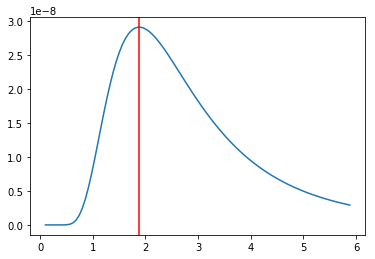

In [25]:
def normal_pdf(mean, var, x):
    return 1/np.sqrt(2* np.pi * var) * np.exp(-(x-mean)**2/(2*var))

np.random.seed(42)
data = np.random.normal(0, 2.0, size = 10) 
mean, var = np.mean(data), np.var(data, ddof=0)
var_range = np.linspace(max(var - 4,0.1), var + 4, 100)
p = normal_pdf(mean, var_range[:, None], data)
p = np.product(p, axis=1)

import pylab as pl
pl.plot(var_range, p)
pl.axvline(var, 0, 1, c = 'r')
pl.show()


## 3. 大小与排序       

|函数名|功能|函数参数|
| :--- | :---: | :---: |
|min|最小值|
|max|最大值|
|minimum|二元最小值|
|maximum|二元最大值|
|ptp|最大值与最小值|
|argmin|最小值的下标|
|argmax|最大值的下标|
|ravel|多维数组flatten为一维数组|
|unravel|一维下标转换为多维下标|
|sort|数组排序|
|argsort|计算数组排序后的下标|
|lexsort|多列排序|
|partition|快速计算前 k 位|
|argpartition|快速计算前 k 位|的下标
|median|中位数|
|percentile|百分位数|
|searchsorted|二分查找|

**Note**:   
- min() 和 max() 计算最大值和最小值, 它们都有 axis, out, keepdims 等参数,和 sum() 不同的是, axis 不支持序列.   
- ptp() 计算最大值和最小值之间的差, 有 axis 和 out 参数.   
- maximum() 和 minimum() 计算两个数组对应下标的元素, 返回数组的形状为两参数数组广播之后的形状.    
- argmin() 和 argmax() 可以求最大值和最小值的下标, 有多个最大值时返回第一个最大值下标.如果不指定 axis 参数, 则返回 flatten 之后的数组下标.  


In [31]:
# maximum() 
a = np.array([1, 3, 5, 7])
b = np.array([2, 4, 6])
print(a[None, :].shape, '\n\n', b[:, None].shape)
np.maximum(a[None, :], b[:, None])   #  None 让维度更明确 

(1, 4) 

 (3, 1)


array([[2, 3, 5, 7],
       [4, 4, 5, 7],
       [6, 6, 6, 7]])

上面的结果最终等价于:    
```
                                             [[1, 3, 5, 7],   [[2, 2, 2, 2]            [[2, 3, 5, 7],
np.maximum(a[None, :], b[:, None])广播之后变为  [1, 3, 5, 7], 和 [4, 4, 4, 4]  比较, 结果为 [4, 4, 5, 7],
                                              [1, 3, 5, 7]]    [6, 6, 6, 6]]            [6, 6, 6, 7]]
```

In [40]:
## argmin() 和 argmax()
np.random.seed(42)
a = np.random.randint(0, 10, size=(4, 5))
max_pos = np.argmax(a, axis=1)  # 如果指定 axis 参数, 则不进行 flatten.  
print(max_pos)
max_pos = np.argmax(a)  # 如果不指定 axis 参数, 则返回 flatten 之后的数组下标.  
print(max_pos)

print(a.ravel()[max_pos], np.max(a))   # ravel()jiang多维数组flatten为一维数组


[2 0 1 2]
5
9 9
